In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [67]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import seaborn as sns
import plotly.express as px


from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(font_scale=2)
sns.set_style("darkgrid")
meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"}

In [21]:
df_clustering = pd.read_csv("data/tuning/clustering/hdbscan.csv",sep=";")
df_clustering["DocEmbedding"] = df_clustering["docEmbedding"] +" - " + df_clustering["docEmbedding2"]
df_clustering = df_clustering.sort_values("DocEmbedding")
df_clustering["Type Clustering"] = np.where(df_clustering["perplexity"].isna(),"Sans tSNE","Avec tSNE")
df_clustering = df_clustering[(df_clustering["K"] >= 5) & (df_clustering["K"] <= 20)]
df_clustering.head()

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,wordEmbedding,docEmbedding,docEmbedding2,DocEmbedding,Type Clustering
10714,3,11,euclidean,12,-0.143543,12.868416,0.003273,9215,NaN,glove,Moyenne,TF,Moyenne - TF,Sans tSNE
10715,3,12,euclidean,11,-0.137430,14.010687,0.003256,9226,NaN,glove,Moyenne,TF,Moyenne - TF,Sans tSNE
10716,4,11,euclidean,9,-0.129933,14.503919,0.002930,9297,NaN,glove,Moyenne,TF,Moyenne - TF,Sans tSNE
48212,6,10,euclidean,8,0.115692,289.942989,0.058288,2882,NaN,skipgram,Moyenne,TF,Moyenne - TF,Sans tSNE
48211,6,11,euclidean,6,0.193207,371.115502,0.058455,2902,NaN,skipgram,Moyenne,TF,Moyenne - TF,Sans tSNE


In [22]:
df_clustering = df_clustering[df_clustering["perplexity"] == 200]

<Figure size 720x504 with 0 Axes>

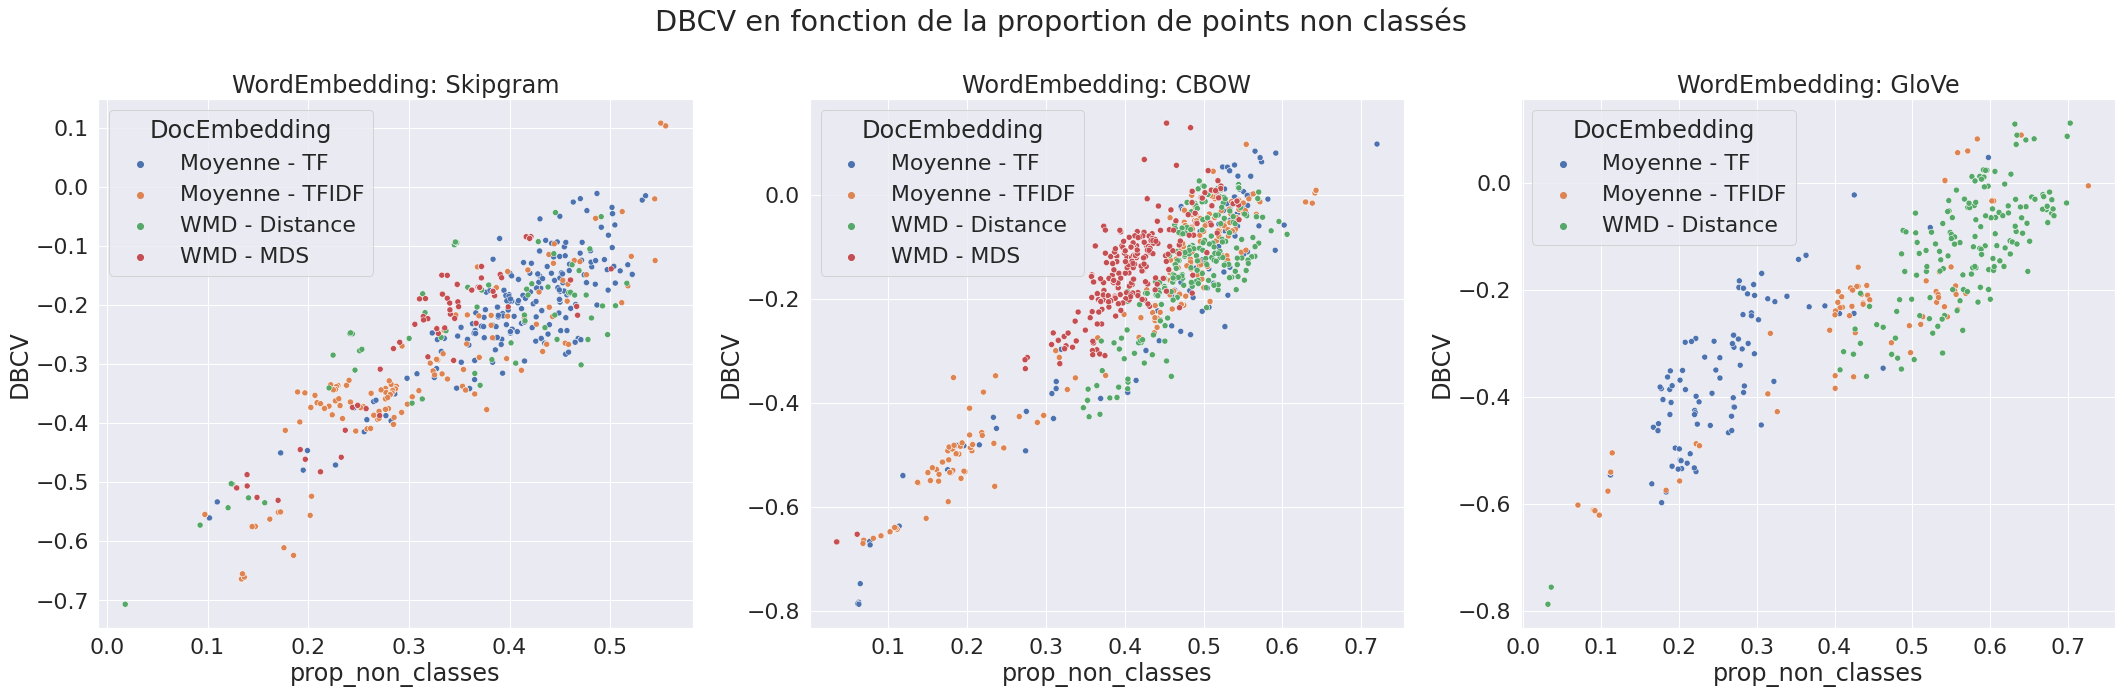

In [70]:
plt.figure(figsize = (10,7))
df_clustering["prop_non_classes"] = df_clustering.non_classes/9501
# sns.lineplot(data=df_clustering,x="prop_non_classes",y="DBCV",hue="DocEmbedding",ci=None,marker="o",markersize=10,)


plt.figure(figsize = (30,10),tight_layout=True)

sns.scatterplot(data=df_clustering[df_clustering["wordEmbedding"]=="skipgram"],y="DBCV",x="prop_non_classes",hue="DocEmbedding",
    ax=plt.subplot(1,3,1,title=f"WordEmbedding: Skipgram"))
sns.scatterplot(data=df_clustering[df_clustering["wordEmbedding"]=="cbow"],y="DBCV",x="prop_non_classes",hue="DocEmbedding",
    ax=plt.subplot(1,3,2,title=f"WordEmbedding: CBOW"))
b = sns.scatterplot(data=df_clustering[df_clustering["wordEmbedding"]=="glove"],y="DBCV",x="prop_non_classes",hue="DocEmbedding",
    ax=plt.subplot(1,3,3,title=f"WordEmbedding: GloVe"))

# sns.scatterplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="K",x="prop_non_classes",hue="DocEmbedding",
#     ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du type d'initialisation"))

plt.suptitle(f"DBCV en fonction de la proportion de points non classés")
plt.show()

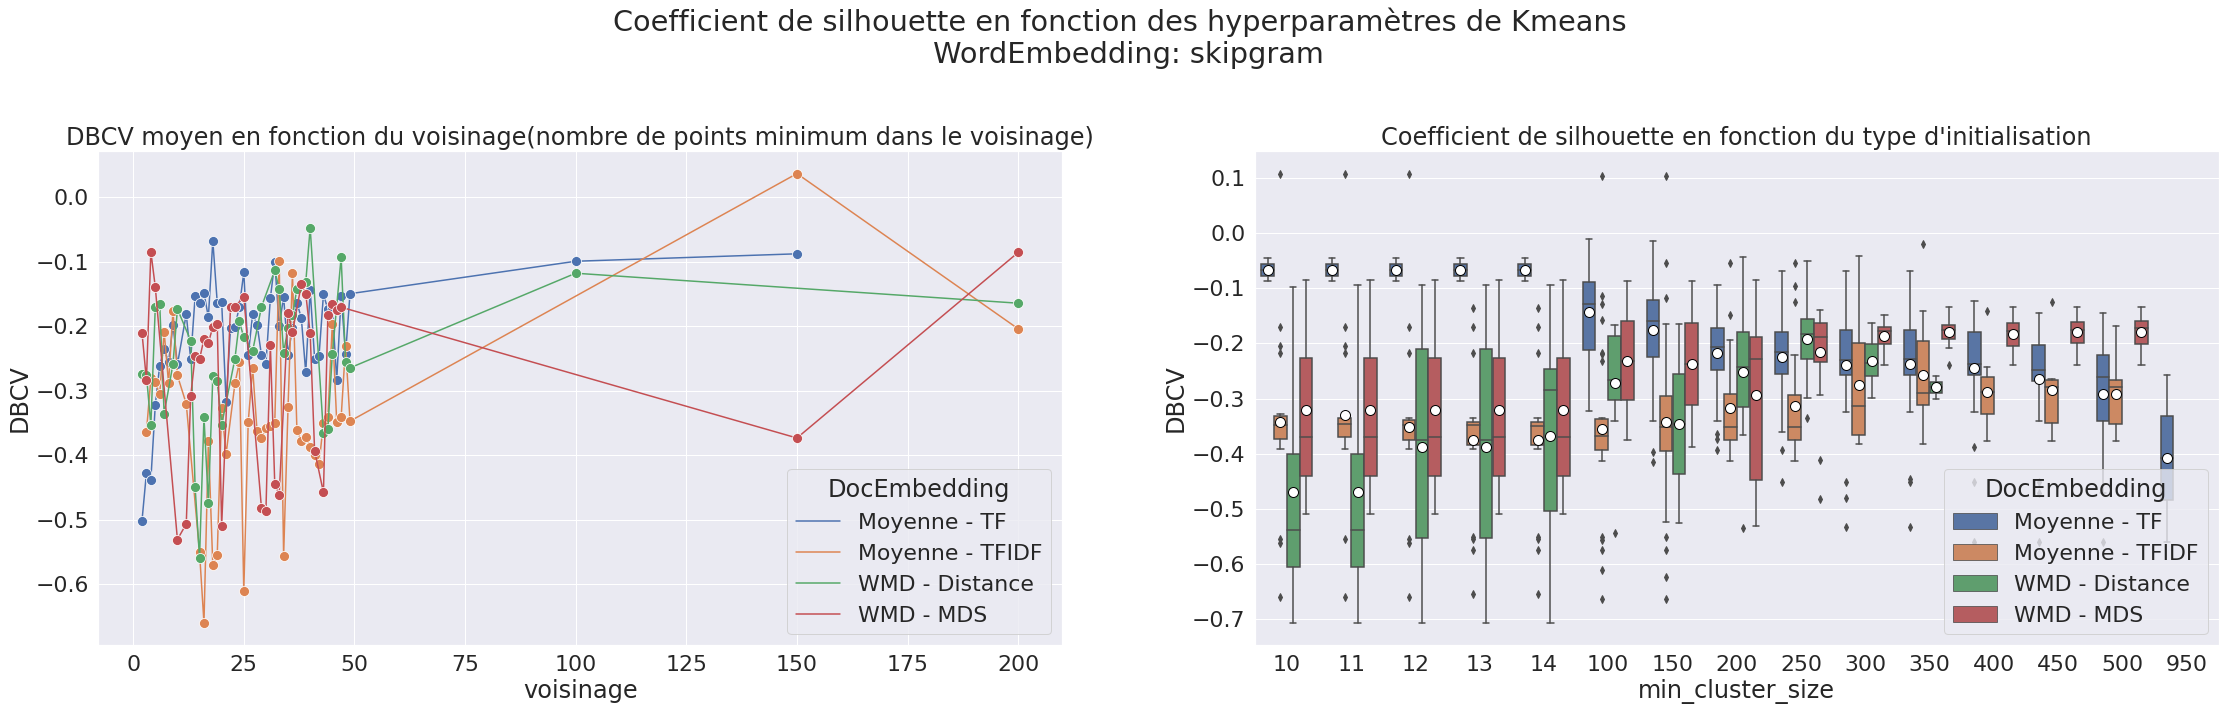

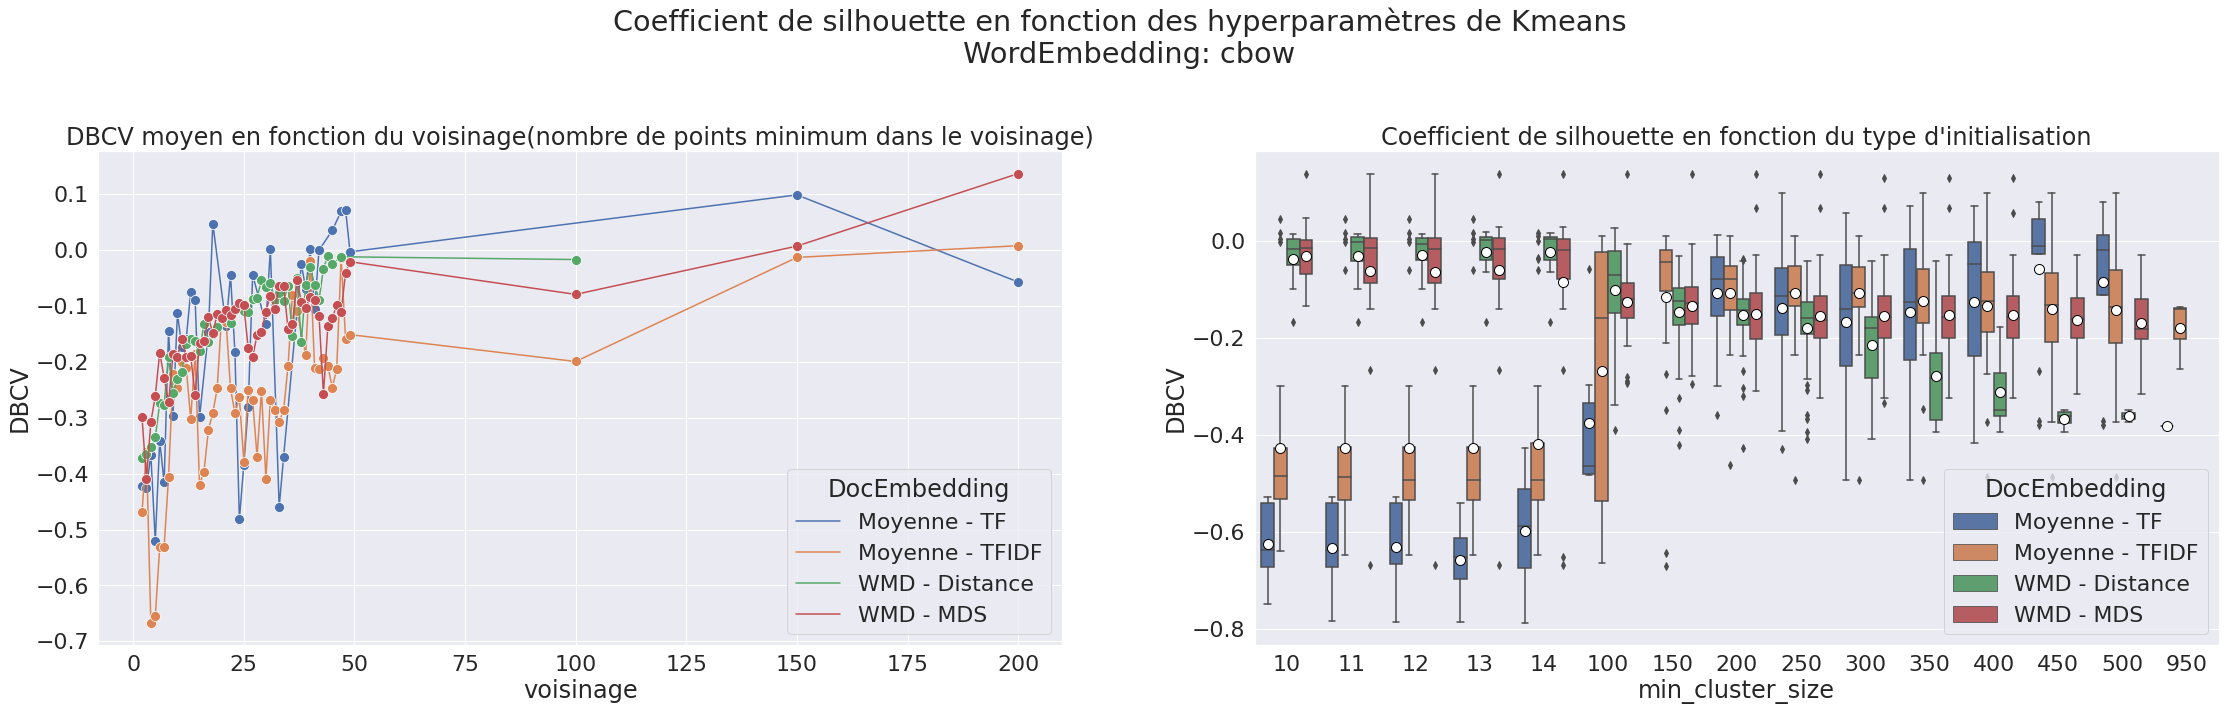

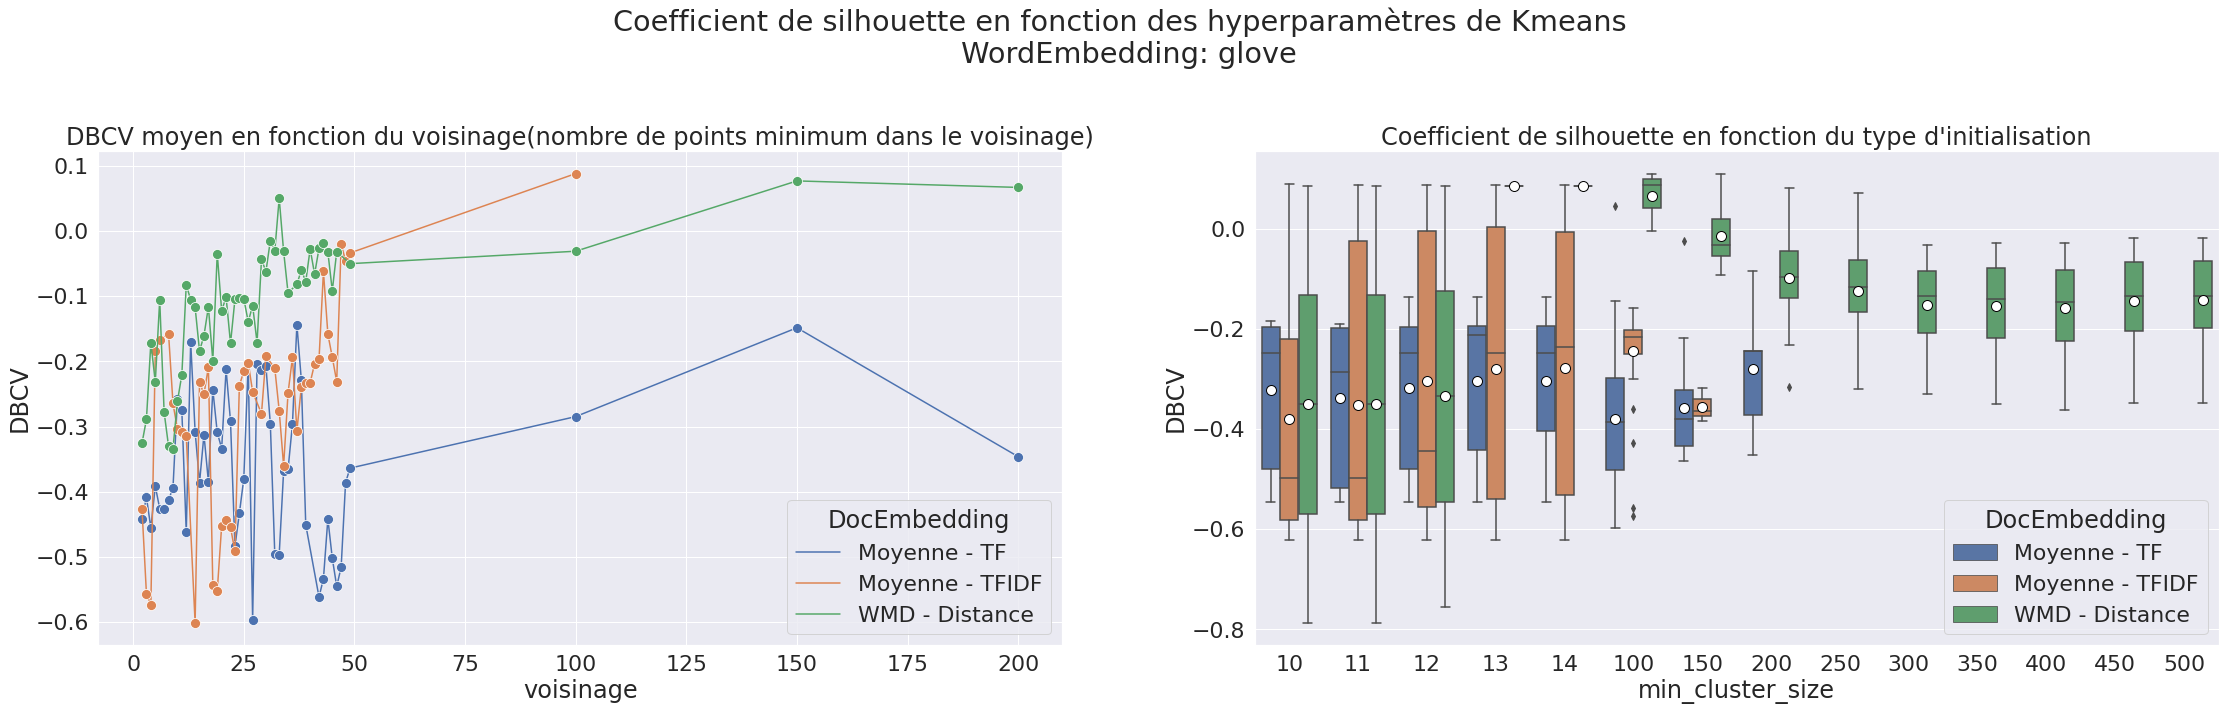

In [56]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (38,20))

    sns.lineplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="DBCV",x="voisinage",hue="DocEmbedding",ci=None,marker="o",markersize=10,
        ax=plt.subplot(2,2,1,title=f"DBCV moyen en fonction du voisinage(nombre de points minimum dans le voisinage)"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="DBCV",x="min_cluster_size",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du type d'initialisation"))

    plt.suptitle(f"Coefficient de silhouette en fonction des hyperparamètres de Kmeans \n WordEmbedding: {modele}")
    plt.show()

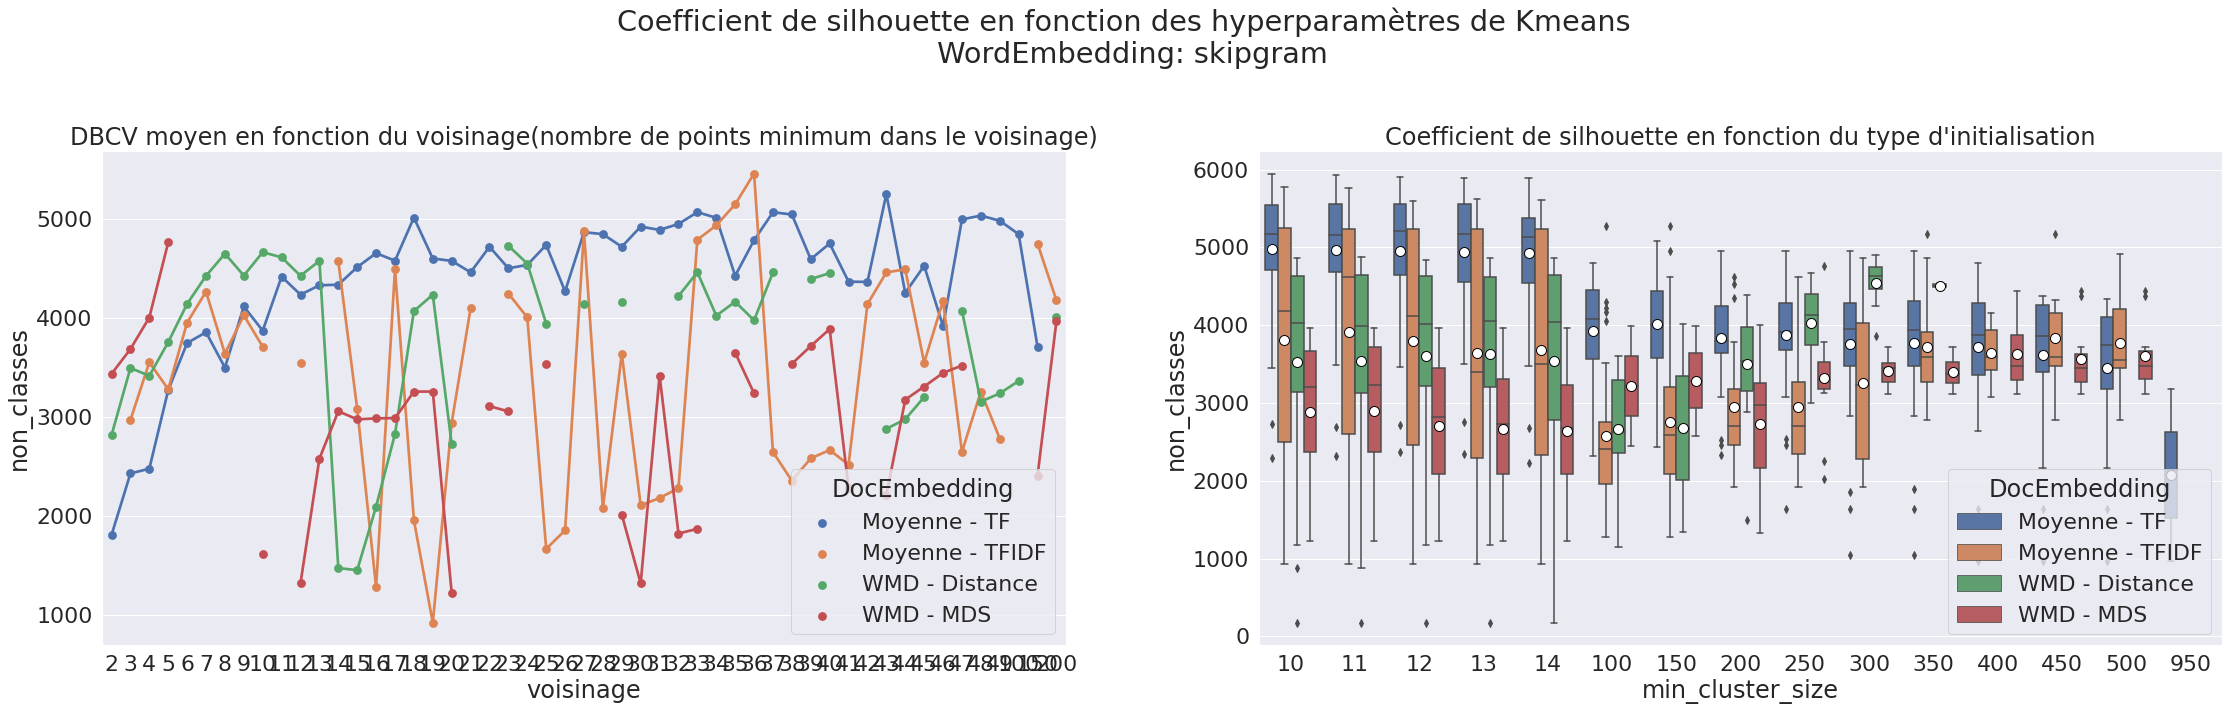

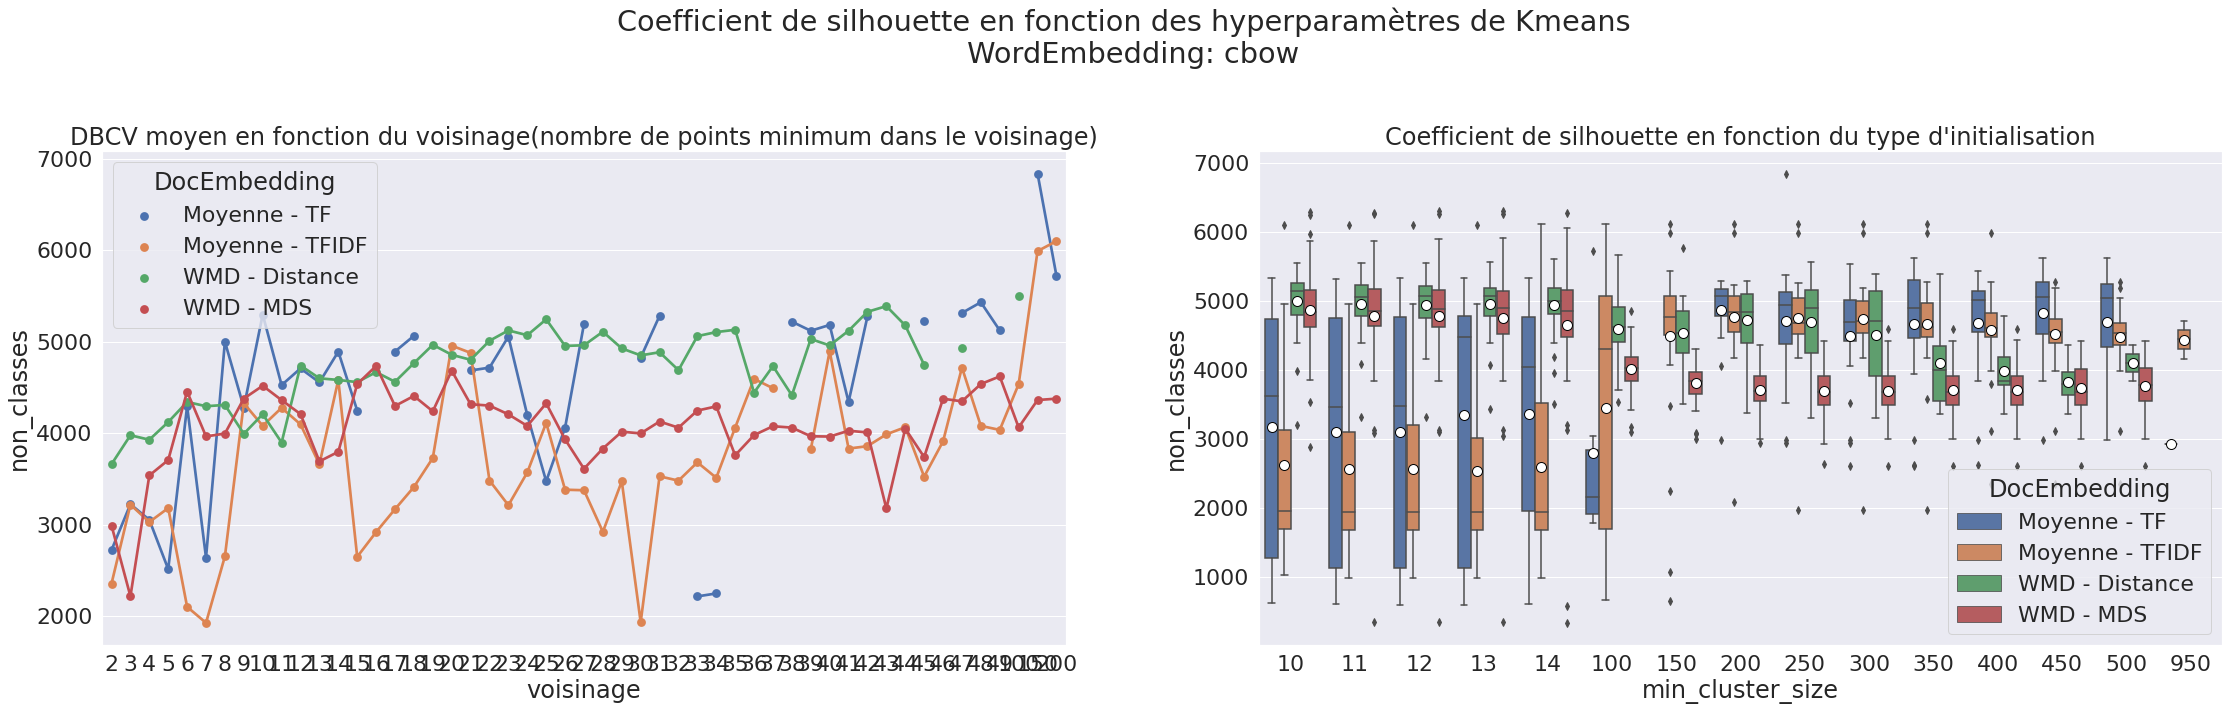

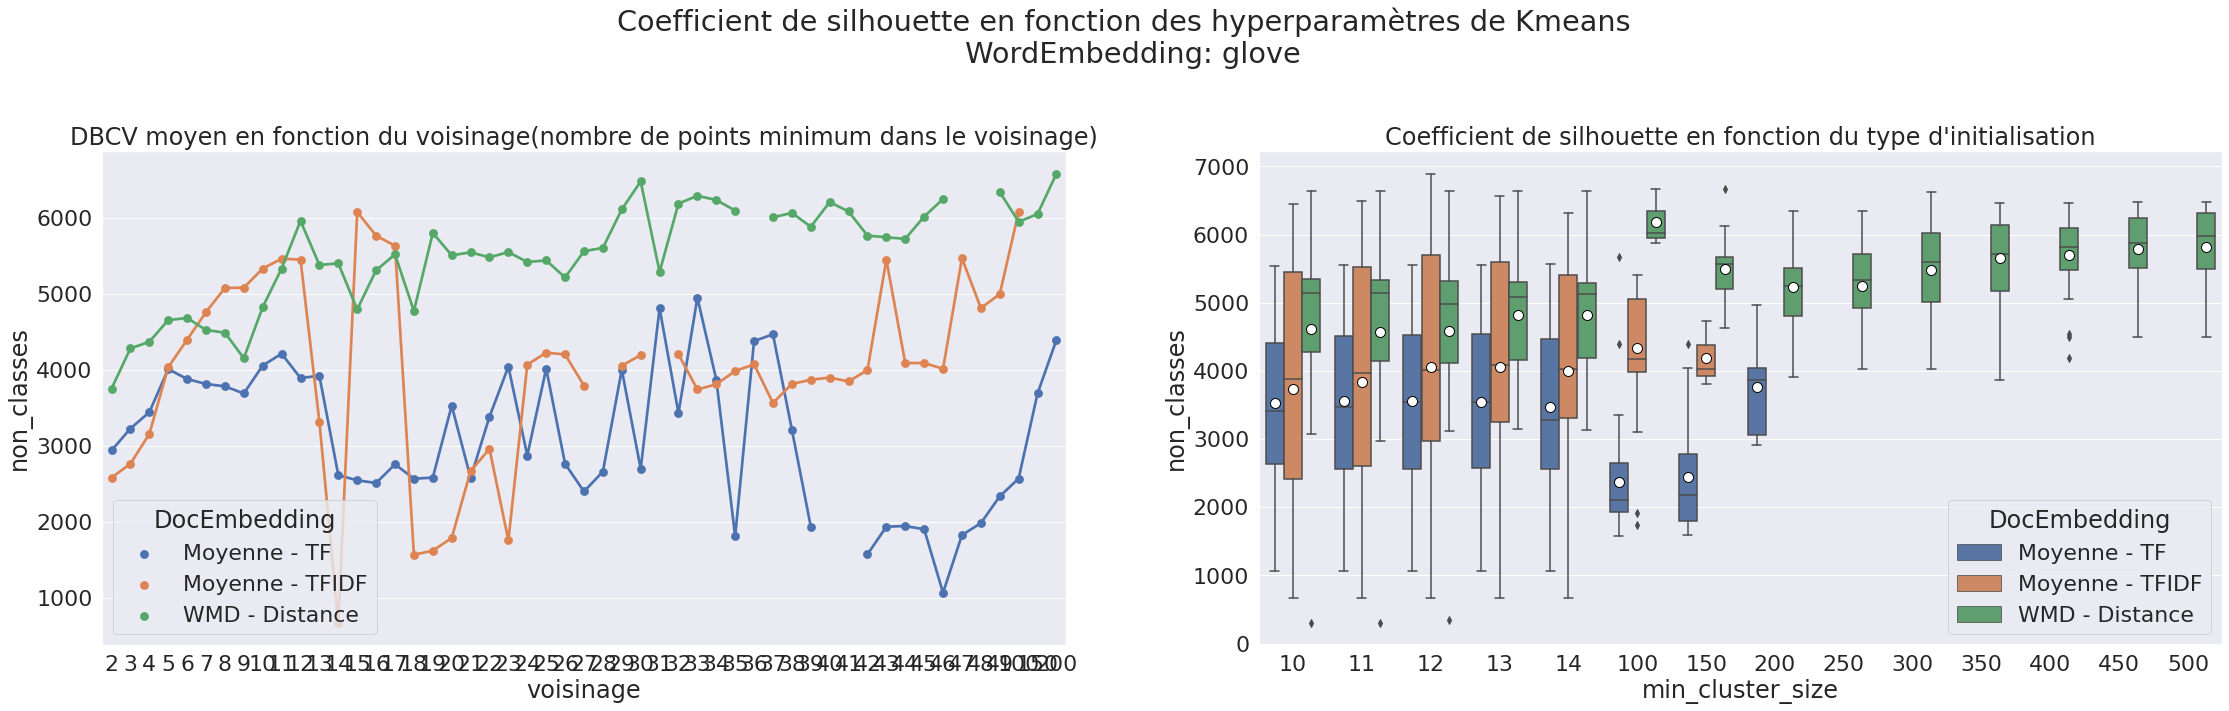

In [7]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (38,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="non_classes",x="voisinage",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"DBCV moyen en fonction du voisinage(nombre de points minimum dans le voisinage)"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="non_classes",x="min_cluster_size",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du type d'initialisation"))

    plt.suptitle(f"Coefficient de silhouette en fonction des hyperparamètres de Kmeans \n WordEmbedding: {modele}")
    plt.show()